### Chicken


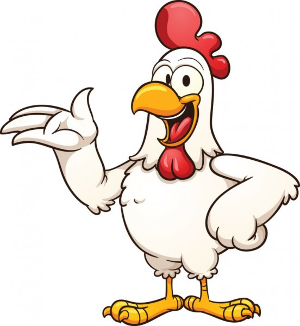

    Bildquelle: Depositphotos.com
    

### Lernziel:

Lernen Sie eine Datei zu laden und den ersten Umgang mit einem DataFrame kennen.


### Hauptziel:

Wie hoch ist der Erlös?

### Daten:

Die Daten habe ich von calmcode.io. Folgende Beschreibung über die Daten ist auf deren Internetseite zu lesen:

<br>

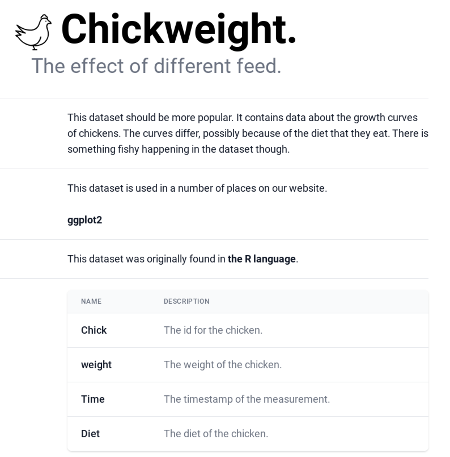
    
    Bildquelle: calmcode.io

#### Importieren der notwendigen Packages

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Laden der csv-Datei

In [2]:
df = pd.read_csv('chickweight.csv')
df.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


#### Kennenlernen der Daten

Folgende Fragen sollte Sie mindestens anschließend beantworten können:

* Wieviele Einträge gibt es?
* Wie viele Merkmale sind vorhanden?
* Welchen Datentyp haben die Merkmale?
* Wieviel NaNs existieren?
* Sind Ausreißer im Datensatz enthalten?
* Fertigen Sie mindestens ein Histogramm an?
* (Noch nicht besprochen:) Existieren Correlationen zwischen den Merkmalen?
* Wieviel verschiedene Einträge existieren je Merkmal?
* ...


In [3]:
# Wie viele Einträge gibt es
df.shape

(578, 4)

In [4]:
# Wie viele Merkmale sind vorhanden? Welchen Datentyp haben die Merkmale? Wieviel NaNs existieren?
pd.concat([df.dtypes, df.nunique(), df.isnull().sum()], axis=1).rename(columns={0:'dtypes', 1:'nunuque', 2:'isnull'})

,dtypes,nunuque,isnull
weight,int64,212,0
Time,int64,12,0
Chick,int64,50,0
Diet,int64,4,0


In [5]:
# Sind Ausreißer im Datensatz enthalten?

df.describe()

,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,10.717993,25.750865,2.235294
std,71.071960,6.758400,14.568795,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,4.000000,13.000000,1.000000
50%,103.000000,10.000000,26.000000,2.000000
75%,163.750000,16.000000,38.000000,3.000000
max,373.000000,21.000000,50.000000,4.000000


<font color='red'>Das Gewicht der Hühner geht bis ca. 340. Da hier keine Einheit zu finden ist und ein normales Huhn 2 - 5 kg schwert ist, werden wir das Gewicht mit 10 multiplizieren.</fontnt>

In [6]:
df['weight'] = df['weight']*10

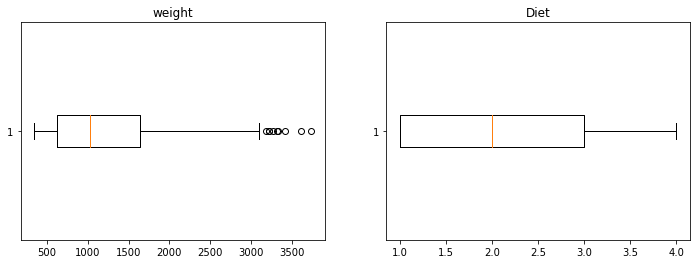

In [7]:
columns = ['weight','Diet']

fig, axs = plt.subplots(1,2, figsize=(12,4))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot(df[columns[i]], vert= False)
    ax.set_title(columns[i])

<font color='red'>**Es werden keine unmöglichen Werte beim Gewicht festgestellt, so dass alle Daten beibehalten werden.**</font>

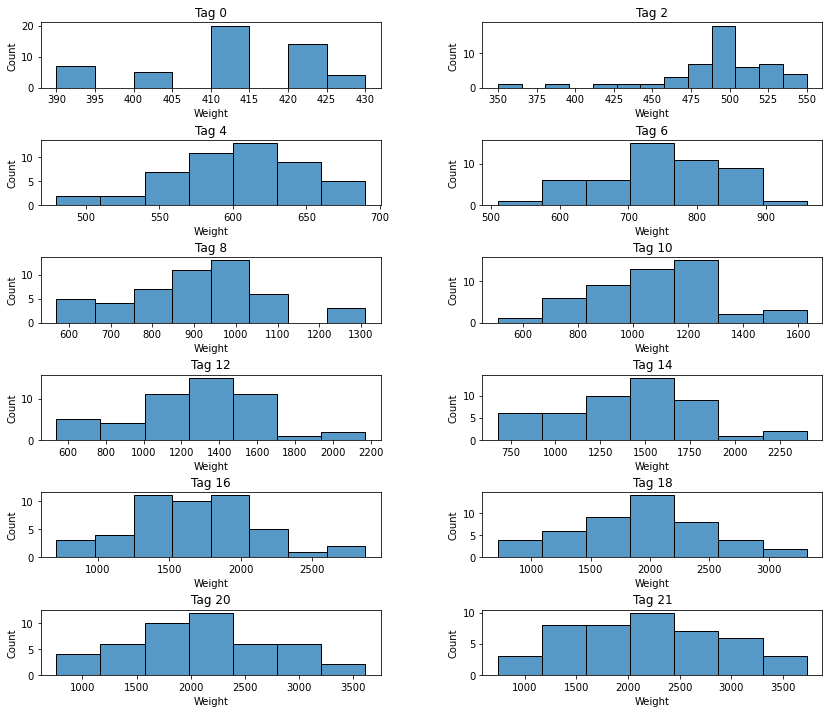

In [8]:
# Ein Blick auf die Gewichtsverteilung in verschiedenen Zeiträumen

columns = df.Time.unique()

fig, axs = plt.subplots(6,2, figsize=(14,12))
plt.subplots_adjust(wspace=0.3, hspace=0.8)

for i, ax in enumerate(axs.flatten()):
    sns.histplot(x= df.loc[df['Time']==columns[i], 'weight'], 
                 ax=ax)
    ax.set_title('Tag {}'.format(columns[i]))
    ax.set_xlabel('Weight')

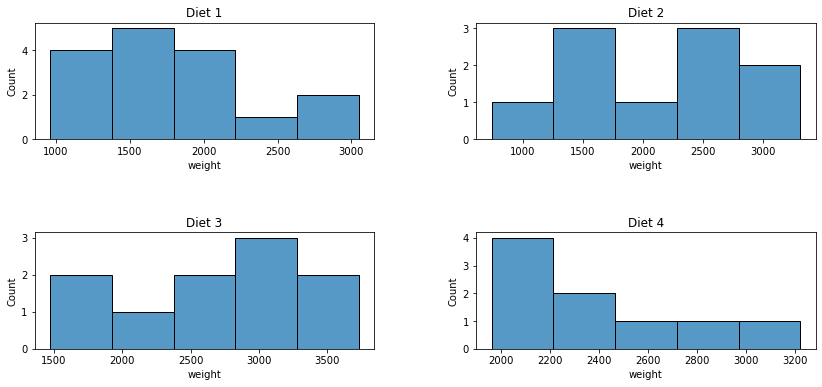

In [38]:
# Gibt es eine Tendenz im Unterschiedlichen Endgewicht je Diät?

diet = df.Diet.unique()


fig, axs = plt.subplots(2,2, figsize=(14,6))
plt.subplots_adjust(wspace=0.3, hspace=0.8)

for i, ax in enumerate(axs.flatten()):
    sns.histplot(x=df.loc[(df['Time']==21)&(df['Diet']==diet[i]), 'weight'], ax=ax)
    ax.set_title('Diet {}'.format(diet[i]))

In [10]:
# Existieren Correlationen zwischen den Merkmalen?
df[['weight','Diet']].corr()

,weight,Diet
weight,1.000000,0.208196
Diet,0.208196,1.000000


<AxesSubplot:xlabel='weight', ylabel='Diet'>

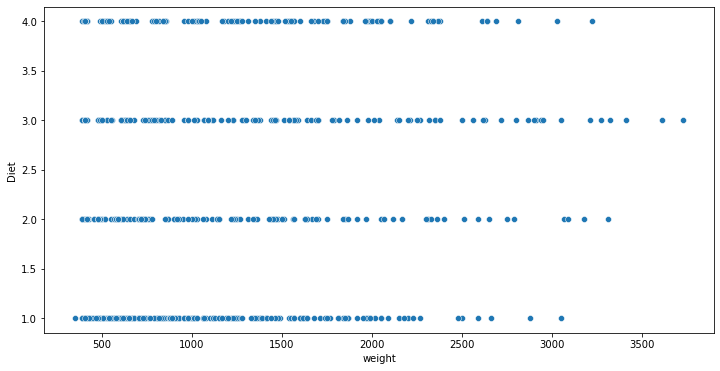

In [11]:
plt.figure(figsize=(12.,6))

sns.scatterplot(y=df.Diet, x= df.weight)

<font color='red'>**Das Streudiagramm zeigt deutlicher, dass die Hühner bei Diät Nummer 3 eher zunehmen**</font>

### Analyse

Wie lange haben die Hühner gelebt? (Wir gehen davon aus, dass die Hühner am 21. Tage verkauft wurden.)

Wir gehen nun von einem Preis von 9 EUR pro kg aus für Hühner mit einem Gewicht über 1.5 kg. Für die Hühner mit einem geringeren Gewicht kann nur ein Preis von 7 EUR erzielt werden. Ermitteln Sie den Preis pro Huhn:

In [12]:
import warnings
warnings.filterwarnings("ignore")

def preis_berechnen(weight):
    if  weight < 1500:
        return weight/1000 * 7
    else:      
        return weight/1000 * 9

df['verkaufspreis'] = df['weight'].apply(preis_berechnen)

**Desweiteren wissen wir die Kosten je Diät Tag:**

* Diät 1: 0.50
* Diät 2: 0.45
* Diät 3: 0.60
* Diät 4: 0.55

Bestimmen Sie die Kosten und dann den Gewinn pro Huhn. Ermitteln Sie anschließend, welche Diät Sie aufgrund vom Gewinn empfehlen würden.

In [13]:
def diaetkosten_berechnen(diet, time):
    diet_kosten_pro_tag = {1:0.5, 2:0.45, 3:0.6, 4:0.55}
    
    for key, value in diet_kosten_pro_tag.items():
        if diet == key:
            return time * value
        

df['diet_kosten'] = df.apply(lambda x: diaetkosten_berechnen(x['Diet'], x['Time']), axis=1)

In [14]:
df.head()

,weight,Time,Chick,Diet,verkaufspreis,diet_kosten
0,420,0,1,1,2.94,0.0
1,510,2,1,1,3.57,1.0
2,590,4,1,1,4.13,2.0
3,640,6,1,1,4.48,3.0
4,760,8,1,1,5.32,4.0


In [15]:
# War der Verkauf am 21. Tag immer der Idealste?

df['kosten_diff'] = df['verkaufspreis'] - df['diet_kosten']
df.head()

,weight,Time,Chick,Diet,verkaufspreis,diet_kosten,kosten_diff
0,420,0,1,1,2.94,0.0,2.94
1,510,2,1,1,3.57,1.0,2.57
2,590,4,1,1,4.13,2.0,2.13
3,640,6,1,1,4.48,3.0,1.48
4,760,8,1,1,5.32,4.0,1.32


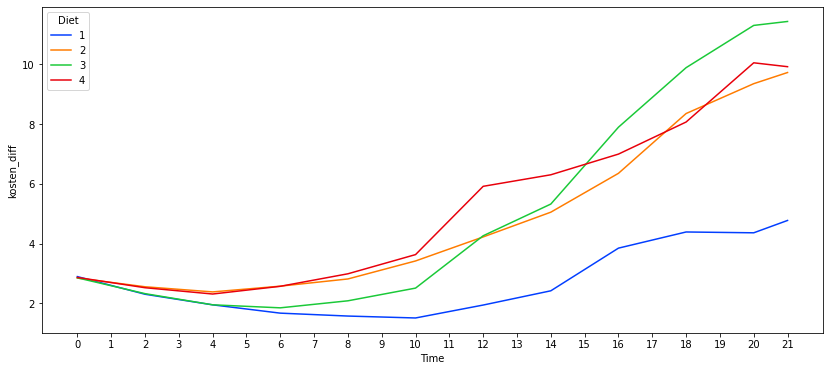

In [16]:
# für welchen Tag und für welche Ernährung ist die maximale Differenz?
plt.figure(figsize=(14,6))

g = sns.lineplot(data=df,
             x='Time',
             y='kosten_diff',
             hue='Diet',
             palette=sns.color_palette("bright",4),
             ci=None)

g.set_xticks(range(0,22,1))
plt.show()

**FAZIT**


<font color='darkblue'>Wenn wir junge Hühner verkaufen wollen, ist **Futter Nummer 4** gerechtfertigt, da es am 12. Tag die maximale Differenz zwischen Verkaufspreis und Futterkosten ergibt. <br>
Gegen Ende des Wachstumszyklus sind Hühner mit **Futter Nummer 3** am rentabelsten. Es ist jedoch sinnvoll, die Hühner am 19. oder 20. Tag zu verkaufen, da es danach keine nennenswerte Gewinnsteigerung mehr gibt. </font>

**EXTRA**:  Wir wollen wissen, ob es einen signifikanten Unterschied zwischen dem Gewicht der Hühner an Tag 20 und 21 bei Futter Nummer 3 gibt.

Der t-Test für abhängige Stichproben überprüft, ob die Mittelwerte zweier abhängiger/gepaarter Stichproben verschieden sind.

**Hypotesen**

        - H0: Es gibt keinen Unterschied zwischen dem Gewicht der Hühner nach 20 und 21 Tagen

        - H1: Es gibt einen Unterschied zwischen dem Gewicht der Hühner nach 20 und 21 Tagen

**Voraussetzungen des t-Tests für abhängige Stichproben**

    - Die abhängige Variable ist min. intervallskaliert --> Ja, das Gewicht ist metrisch

    - Es liegen zwei verbundene Stichproben oder Gruppen vor, aber die verschiedenen Messwertpaare sind voneinander unabhängig --> Ja, ja, es handelt sich um unabhängige Gruppen von Hühnern
    
    - Die Unterschiede zwischen den verbundenen Testwerten sind in der Grundgesamtheit normalverteilt (bei Stichproben > 30 sind Verletzungen unproblematisch) --> sieh Histogramms

In [79]:
# Vorbereitung des Datensatzes

mask_time = (df['Time']==21) | (df['Time']==20)
mask_diet = df['Diet']==3

df_ttest = df.loc[mask_time & mask_diet, ['Time', 'weight', 'Diet','Chick']]
df_ttest.head()

,Time,weight,Diet,Chick
350,20,2350,3,31
351,21,2560,3,31
362,20,2910,3,32
363,21,3050,3,32
374,20,1560,3,33


In [76]:
df_ttest.groupby('Time').agg(AVG_weight = ('weight','mean'), Anzahl=('weight', 'size'))

,AVG_weight,Anzahl
Time,,
20,2589.0,10
21,2703.0,10


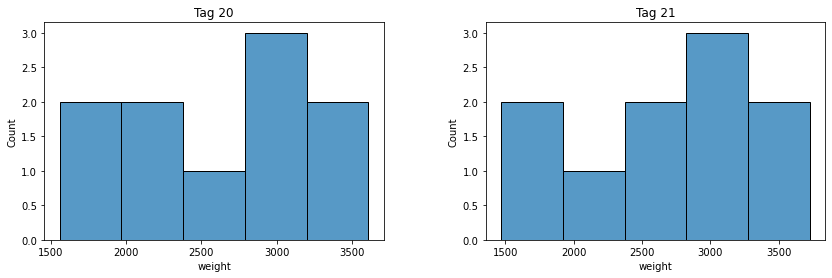

In [40]:
# Pruefung der Normalverteileung 

Time = df_ttest.Time.unique()


fig, axs = plt.subplots(1,2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.8)

for i, ax in enumerate(axs.flatten()):
    sns.histplot(x=df_ttest.loc[df_ttest['Time']==Time[i], 'weight'], ax=ax)
    ax.set_title('Tag {}'.format(Time[i]))


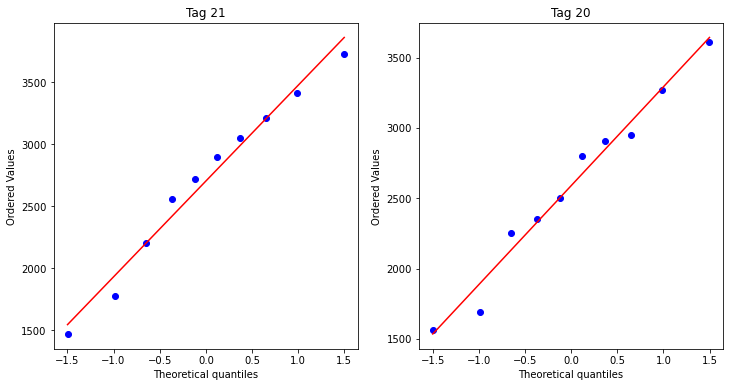

In [49]:
# QQ-Diagramm zur Prüfung des Normalverteilung

from scipy import stats


fig, axs = plt.subplots(1,2, figsize=(12,6))

stats.probplot(df_ttest.loc[df_ttest['Time']==21, 'weight'], plot=axs[0])
stats.probplot(df_ttest.loc[df_ttest['Time']==20, 'weight'], plot=axs[1])

axs[0].set_title('Tag 21')
axs[1].set_title('Tag 20')

plt.show()

**Normalverteilung ist vorliegt.**

In [81]:
df_ttest.head(5)

,Time,weight,Diet,Chick
350,20,2350,3,31
351,21,2560,3,31
362,20,2910,3,32
363,21,3050,3,32
374,20,1560,3,33


In [90]:
# Korrelation

df_corr = df_ttest.pivot(index='Chick', columns='Time', values='weight').reset_index().rename(columns={20:'Tag_20', 21:'Tag_21'})

In [110]:
df_corr.corr()

Time,Chick,Tag_20,Tag_21
Time,,,
Chick,1.000000,0.073967,0.109396
Tag_20,0.073967,1.000000,0.990986
Tag_21,0.109396,0.990986,1.000000


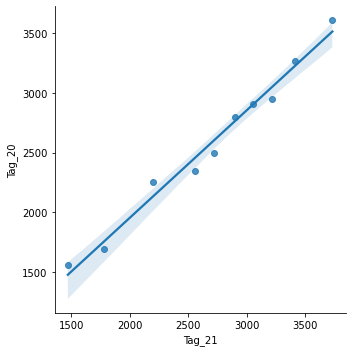

In [99]:
sns.lmplot(data=df_corr, x='Tag_21', y='Tag_20')

In [101]:
df_corr[['Tag_20', 'Tag_21']].describe()

Time,Tag_20,Tag_21
count,10.000000,10.000000
mean,2589.000000,2703.000000
std,652.439014,716.225446
min,1560.000000,1470.000000
25%,2275.000000,2290.000000
50%,2650.000000,2810.000000
75%,2940.000000,3170.000000
max,3610.000000,3730.000000


In [105]:
# Calculate the t-test on TWO RELATED samples of scores, a and b.

t, p_val = stats.ttest_rel(df_corr['Tag_20'], df_corr['Tag_21'],alternative='two-sided')

print('Statistik = {}, p_value= {}'.format(t,p_val))

Statistik = -3.22526710814625, p_value= 0.010401220246464176


<font color='red'>Bei Fehler 1.Art = 0.05 --> H0 kann verworfen werden<br>
Bei Fehler 1.Art = 0.01 --> H0 kann beibehalten werden</font>

**10 Beobachtungen sind offensichtlich nicht genug, um eine eindeutige Schlussfolgerung zu ziehen. Ich würde empfehlen, mehr Beobachtungen zu sammeln und zweifelsfrei festzustellen, welcher Fehler vom Typ 1 uns zufrieden stellt.**

Berechnung der Effektstärke

$$r= \sqrt {\frac{t^2}{t^2+df}}$$

In [109]:
r =  np.sqrt(t**2 / (t**2+9))
r

0.7322148686426588

Nach Cohen (1992) etschpricht **r Werte** einem grossen Effekt